# 信息增益算法

predict[0]


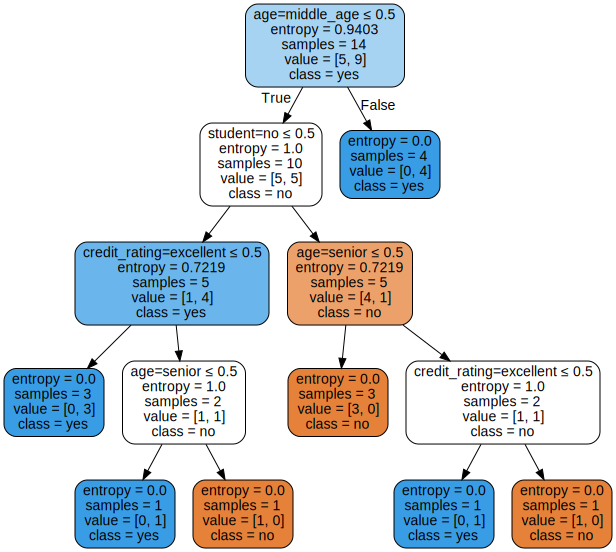

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import preprocessing
import csv
import graphviz

#载入数据
Dtree = open("AllElectronics.csv",'r')
reader = csv.reader(Dtree)

#获取第一行数据(表头) ， 读完后跳到第二行
headers = reader.__next__()

#定义两个列表
featureList = []
labelList = []

#
for row in reader:
    #把是否买电脑的label存入list
    labelList.append(row[-1])
    rowDict = {}
    for i in range(1,len(row)-1):
        #建立一个数据字典
        rowDict[headers[i]] = row[i]
    #把数据字典存入list
    featureList.append(rowDict)

# print(featureList)

#把数据转换成 0 1 表示
vec = DictVectorizer()
x_data = vec.fit_transform(featureList).toarray()
# print('x_data:\n',str(x_data))

#打印属性名称
# print(vec.get_feature_names())
# print('labelList:\n'+str(labelList))

#把标签转换成 0 1 表示
lb = preprocessing.LabelBinarizer()
y_data = lb.fit_transform(labelList)
# print('y_data:\n'+str(y_data))

#创建决策树模型
'''
criterion->表示在基于特征划分数据集合时，选择特征的标准,默认是'gini'。
Gini不纯度表示该Gini度量是指随机选择集合中的元素，根据集合中label的分布将该元素赋予分类，
该元素分类错误的几率；
entropy则表示采用信息增益来选择特征
'''
model = tree.DecisionTreeClassifier(criterion='entropy')

#输入数据建立模型
model.fit(x_data,y_data)

#测试
x_test = x_data[0]
# print("x_test : "+str(x_test))

#预测
predict = model.predict(x_test.reshape(1,-1))
print('predict'+str(predict))

#画出决策树
dot_data = tree.export_graphviz(model,#训练好的模型
                               out_file=None,#不输出文件
                               feature_names=vec.get_feature_names(),#特征的名字 age=middle_age
                               class_names=lb.classes_,#标签  class = yes no 
                               filled=True,#
                               rounded=True,#
                               special_characters=True#
                               )

graph = graphviz.Source(dot_data)
# graph.render("computer")  #把图保存到当前目录下
graph  #打印决策树的图


# CART算法

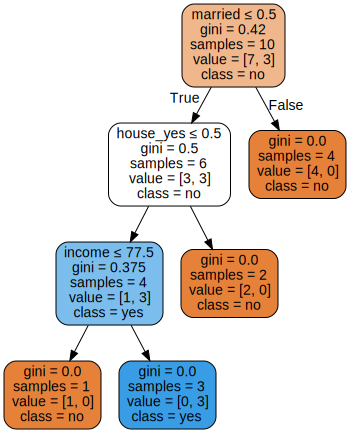

In [1]:
import numpy as np
from sklearn import tree
import graphviz

#加载数据
data = np.genfromtxt("cart.csv",delimiter=',')
x_data = data[1:,1:-1]
y_data = data[1:,-1]

#创建决策树模型
model = tree.DecisionTreeClassifier(criterion='gini')#默认gini

#输入数据建立模型
model.fit(x_data,y_data)

#导出决策树
dot_data = tree.export_graphviz(model,
                                out_file=None,
                              feature_names=['house_yes','house_no','single','married','divorced','income'],#特征的名字 
                               class_names=['no','yes'],#标签 
                                filled=True,#
                               rounded=True,#
                               special_characters=True#
                               )

graph = graphviz.Source(dot_data)
graph.render("cart")  #把图保存到当前目录下
graph  #打印决策树的图


# 决策树实现线性二分类

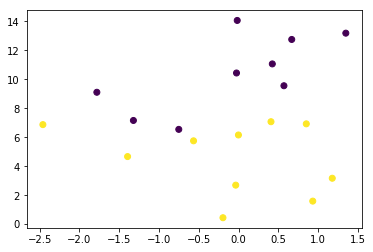

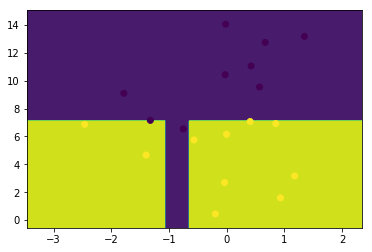

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         9
        1.0       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        19



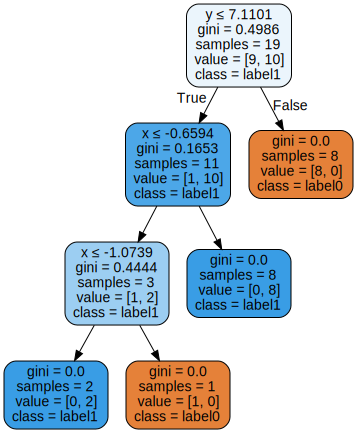

In [1]:
import numpy as np
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import graphviz

#加载数据
data = np.genfromtxt("LR-testSet.csv",delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

#创建决策树模型
model = tree.DecisionTreeClassifier()

#输入数据 建立模型
model.fit(x_data,y_data)

#画出决策树
dot_data = tree.export_graphviz(model,
                               out_file=None,
                               feature_names=['x','y'],
                               class_names=['label0','label1'],
                               filled=True,
                               rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("LR-testSet")  #把图保存到当前目录下

#获取数据值所在的范围
x_min,x_max = x_data[:,0].min()-1,x_data[:,0].max()+1
y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()+1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

#等高线图
cs = plt.contourf(xx,yy,z)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

predictions = model.predict(x_data)
print(classification_report(predictions,y_data))

graph

# 决策树实现非线性二分类

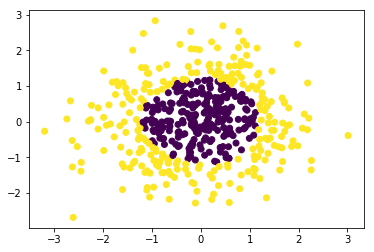

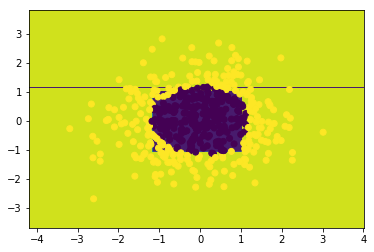

-----------------------------------------------------
训练集准确率 :
             precision    recall  f1-score   support

        0.0       0.98      0.93      0.96       198
        1.0       0.93      0.98      0.95       177

avg / total       0.96      0.95      0.95       375

测试集准确率 :
             precision    recall  f1-score   support

        0.0       0.87      0.87      0.87        63
        1.0       0.87      0.87      0.87        62

avg / total       0.87      0.87      0.87       125

------------------------------ 决策树 ------------------------------


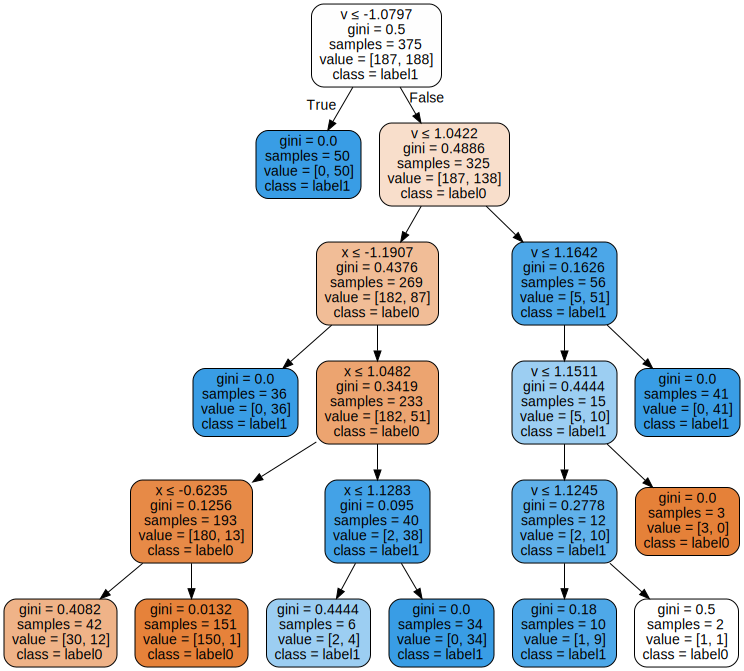

In [1]:
import numpy as np
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import graphviz

#加载数据
data = np.genfromtxt("LR-testSet2.csv",delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)

# #  创建决策树模型
# max_depth : 树的深度 
#min_samples_split : 内部节点再划分所需最小样本
model = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=2)
model.fit(x_train,y_train)

#导出决策树
dot_data = tree.export_graphviz(model,
                               out_file=None,
                               feature_names=['x','v'],
                               class_names=['label0','label1'],
                               filled=True,
                               rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

#获取数据值所在的范围
x_min,x_max = x_data[:,0].min()-1,x_data[:,0].max()+1
y_min,y_max = x_data[:,1].min()-1,x_data[:,1].max()+1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

#等高线图
cs = plt.contourf(xx,yy,z)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

print('-----------------------------------------------------')
print("训练集准确率 :")
predictions = model.predict(x_train)
print(classification_report(predictions,y_train))

print("测试集准确率 :")
predictions = model.predict(x_test)
print(classification_report(predictions,y_test))
print('------------------------------ 决策树 ------------------------------')
graph
